In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
ad_input_data = pd.DataFrame(pd.read_csv("../Advertising.csv"))
ad_input_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Lets inspect the data
ad_input_data.shape
ad_input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
ad_input_data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
#Lets do a bit of data cleaning
ad_input_data.isnull().sum()*100/ad_input_data.shape[0]

Unnamed: 0    0.0
TV            0.0
radio         0.0
newspaper     0.0
sales         0.0
dtype: float64

In [6]:
#Above result indicates that there are no null values in the dataset.  Hence the data appears to be clean

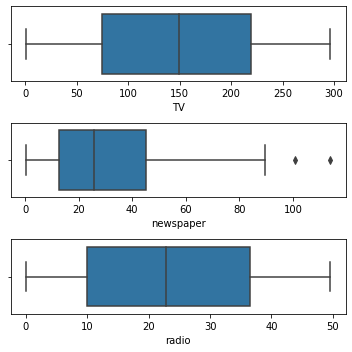

In [7]:
#Lets perform the Outlier analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(ad_input_data['TV'], ax = axs[0])
plt2 = sns.boxplot(ad_input_data['newspaper'], ax = axs[1])
plt3 = sns.boxplot(ad_input_data['radio'], ax = axs[2])
plt.tight_layout()

In [8]:
#There are no considerable outliers present in the data

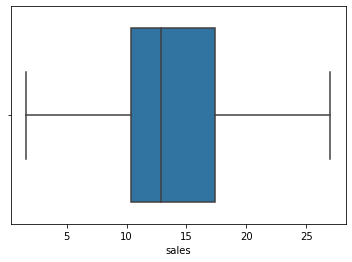

In [9]:
#EDA
#Univariate analysis
sns.boxplot(ad_input_data['sales'])
plt.show()

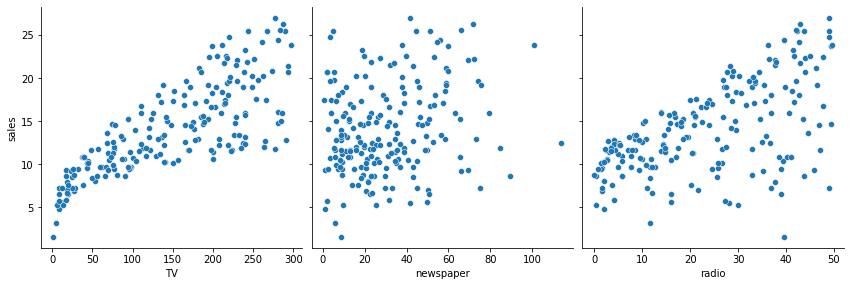

In [10]:
# Let's see how sales are related with other variables using scatter plot.
sns.pairplot(ad_input_data, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

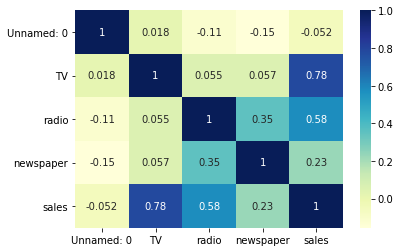

In [11]:
# Let's see the correlation between different variables.
sns.heatmap(ad_input_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [12]:
#Heatmap shows clearly that TV seems to be the most correlated with the Sales.  This is enough to indicate that simple linear
# regression using TV as a feature variable should serve the purpose for us

In [13]:
#Model building
#Simple Linear Regression
X = ad_input_data['TV']
y = ad_input_data['sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [14]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

In [15]:
#Lets build a linear model
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const    6.989666
TV       0.046497
dtype: float64

In [16]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.84e-30
Time:                        13:27:39   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

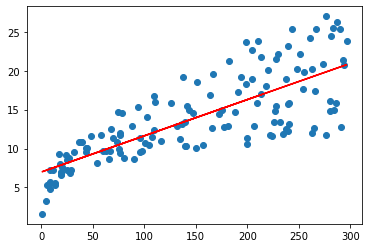

In [17]:
#Looking at some key statistics from the summary

# 1. The coefficients and significance (p-values)
# 2. R-squared
# 3. F-statistic and its significance

# 1. Coefficient for TV is 0.0465 with a very low p-value (almost 0) - This means that the association between TV and sales is not by chance
# 2. R-squared is 0.613 - This means 61.3% of variance in sales is explained by TV
# 3. F-statistic has a very low p-value.  This means that model fit is statistically significant and the variant is not purely by chance

# So the fit is significant and hence lets visualize how well the model fits the data

# The linear regression with TV as the variable becomes
#           Sales = 6.9897 + (0.0465) * TV

plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9897 + 0.0465*X_train, 'r')
plt.show()


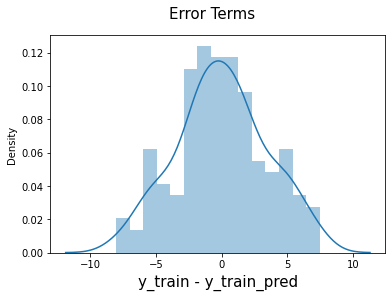

In [18]:
# Model Evaluation

# Residual analysis and Distribution of error terms
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()


In [19]:
# From the above plot it appears that the residuals are normally distributed with a mean value of 0.  This means everything is good

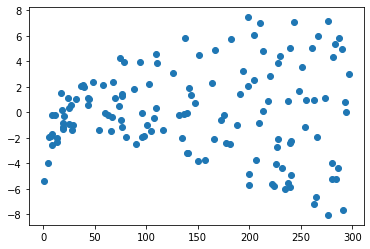

In [20]:
# Now lets look for patterns in the residuals

plt.scatter(X_train,res)
plt.show()

In [21]:
# As seen above, there is a clear indication that model fit is not by chance.  A decent predictive power is shown
# The normality of residual terms allows some interference on the coefficients

# Moreover, the regression line is a pretty good fit to the data as seen in the previous plot

In [22]:
# Predictions on the test set

#lets make some predictions on the test set since we have fitted a regression line on the training dataset

X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Lets look at the RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327003

In [24]:
# Lets check the R-squared on the test set

r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783303

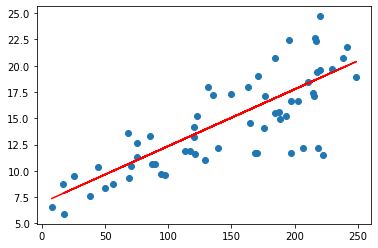

In [25]:
# Lets visualize the fit on the test data set

plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [26]:
# The above analysis clearly shows that TV plays as one of the key feature variable in determining the sales